# Alkım Ege Akarsu | 21901461 | CS 484 | HW1

## Package Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import listdir
import cv2 as cv

image_index_list = [2, 7, 13, 14]
CANNY_PARAMETER = 100
HOUGH_THRESHOLD = 50
NUMBER_OF_BINS = 8

## Functions

In [2]:
def four_sample_images(dict, title, image_index_list):
    """Displays four sample images from the given dict

    Args:
        dict (dict): Dict containing images
        title (str): Title of the figure
        image_index_list (list): Four indexes of images in the dict
    """
    plt.figure()
    plt.suptitle(title)
    for i, image_i in enumerate(image_index_list):
        image = list(dict.values())[image_i]
        plt.subplot(2, 2, i + 1)
        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        plt.imshow(image, cmap="gray")
    plt.tight_layout()


def display_all_images(dict, title):
    """Displays all images

    Args:
        dict (dict): Dict containing images
        title (str): Title of the figure
    """
    plt.figure()
    plt.suptitle(title)
    for i, image_i in enumerate(range(15)):
        image = list(dict.values())[image_i]
        plt.subplot(3, 5, i + 1)
        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        plt.imshow(image, cmap="gray")
    plt.tight_layout()


def load_images_dict():
    """Load template and rotated images.
    
    Returns:
        dict: Template images
        dict: Rotated images
    """
    # Prepare image storage dicts
    template_images = {}
    rotated_images = {}
    # Get image directories
    template_image_directory = Path().resolve().joinpath("HW2_images", "template images")
    rotated_image_directory = Path().resolve().joinpath("HW2_images", "rotated images")
    # Get list of image names inside image directories
    template_image_paths = [template_image_directory.joinpath(file_name) for file_name in listdir(template_image_directory)]
    rotated_image_paths = [rotated_image_directory.joinpath(file_name) for file_name in listdir(rotated_image_directory)]
    # Load images
    for image_path in template_image_paths:
        template_images[image_path.name] = plt.imread(image_path)
    for image_path in rotated_image_paths:
        rotated_images[image_path.name] = plt.imread(image_path)
    
    return template_images, rotated_images


def rgb_to_grayscale_dict(template_images, rotated_images):
    """Converts template and rotated image dicts to grayscale.

    Args:
        template_images (dict): Template images
        rotated_images (dict): Rotated images
    
    Returns:
        dict: Template images in grayscale
        dict: Rotated images in grayscale
    """
    # Convert template and rotated images to grayscale
    template_images_grayscale = {image_name: cv.cvtColor(template_images[image_name], cv.COLOR_RGB2GRAY) for image_name in template_images}
    rotated_images_grayscale = {image_name: cv.cvtColor(rotated_images[image_name], cv.COLOR_RGB2GRAY) for image_name in rotated_images}
    # Normalize converted images to 0 - 255 range
    template_images_grayscale = {image_name: cv.normalize(template_images_grayscale[image_name], None, 255, 0, cv.NORM_MINMAX, cv.CV_8U) for image_name in template_images_grayscale}
    rotated_images_grayscale = {image_name: cv.normalize(rotated_images_grayscale[image_name], None, 255, 0, cv.NORM_MINMAX, cv.CV_8U) for image_name in rotated_images_grayscale}
    
    return template_images_grayscale, rotated_images_grayscale


def canny_dict(template_images_grayscale, rotated_images_grayscale, p):
    """Applies Canny edge detection to all images in the dicts
    
    Args:
        template_images_grayscale (dict): Grayscale template images
        rotated_images_grayscale (dict): Grayscale rotated images
    
    Returns:
        dict: Canny edge detected template images
        dict: Canny edge detected rotated images
    """
    # Apply Canny edge detection to all images in the dicts
    template_images_canny = {image_name: cv.Canny(template_images_grayscale[image_name], CANNY_PARAMETER, 3 * CANNY_PARAMETER) for image_name in template_images_grayscale}
    rotated_images_canny = {image_name: cv.Canny(rotated_images_grayscale[image_name], CANNY_PARAMETER, 3 * CANNY_PARAMETER) for image_name in rotated_images_grayscale}
    
    return template_images_canny, rotated_images_canny


def hough_dict(template_images_canny, rotated_images_canny):
    """Applies Hough transform to all images in the dicts
    
    Args:
        template_images_canny (dict): Canny edge detected template images
        rotated_images_canny (dict): Canny edge detected rotated images
    
    Returns:
        dict: Hough transformed template images
        dict: Hough transformed rotated images
    """
    # Apply Hough transform to all images in the dicts
    template_images_hough = {image_name: cv.HoughLinesP(template_images_canny[image_name], 1, np.pi / 180, HOUGH_THRESHOLD) for image_name in template_images_canny}
    rotated_images_hough = {image_name: cv.HoughLinesP(rotated_images_canny[image_name], 1, np.pi / 180, HOUGH_THRESHOLD) for image_name in rotated_images_canny}
    
    return template_images_hough, rotated_images_hough


def draw_lines_dict(template_images_grayscale, rotated_images_grayscale, template_images_hough, rotated_images_hough):
    """Draws lines on all images in the dicts
    
    Args:
        template_images (dict): Template images
        rotated_images (dict): Rotated images
        template_images_hough (dict): Hough transformed template images
        rotated_images_hough (dict): Hough transformed rotated images
    
    Returns:
        dict: Drawn lines on template images
        dict: Drawn lines on rotated images
    """
    # Prepare result dicts
    template_images_with_lines = template_images_grayscale.copy()
    rotated_images_with_lines = rotated_images_grayscale.copy()
    # Convert result dicts from grayscale to RGB
    template_images_with_lines = {image_name: cv.cvtColor(template_images_with_lines[image_name], cv.COLOR_GRAY2RGB) for image_name in template_images_with_lines}
    rotated_images_with_lines = {image_name: cv.cvtColor(rotated_images_with_lines[image_name], cv.COLOR_GRAY2RGB) for image_name in rotated_images_with_lines}
    # Draw lines on all images in the dicts
    for image_name in template_images_grayscale:
        # Get lines
        lines = template_images_hough[image_name]
        for i in range(0, len(lines)):
            l = lines[i][0]
            cv.line(template_images_with_lines[image_name], (l[0], l[1]), (l[2], l[3]), (0,255,0), 2, cv.LINE_AA)
    for image_name in rotated_images_grayscale:
        # Get lines
        lines = rotated_images_hough[image_name]
        for i in range(0, len(lines)):
            l = lines[i][0]
            cv.line(rotated_images_with_lines[image_name], (l[0], l[1]), (l[2], l[3]), (0,255,0), 2, cv.LINE_AA)
    
    return template_images_with_lines, rotated_images_with_lines


def get_lines_orientation_length(template_images_hough, rotated_images_hough):
    """Gets the statistics of the Hough lines in the dicts
    
    Args:
        template_images_hough (dict): Hough transformed template images
        rotated_images_hough (dict): Hough transformed rotated images
    
    Returns:
        dict: Statistics of the Hough lines in the template images
        dict: Statistics of the Hough lines in the rotated images
    """
    # Prepare result dicts
    template_images_lines_orientation_length = {}
    rotated_images_lines_orientation_length = {}
    # Get the statistics of the Hough lines in the dicts
    for image_name, lines in template_images_hough.items():
        temp_orientation_length = []
        for i in range(0, len(lines)):
            x1, y1, x2, y2 = lines[i][0]
            # Get line length
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            # Get line orientation between -180 and 180 degrees
            orientation = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
            # Save length and orientation
            temp_orientation_length.append((orientation, length))
        template_images_lines_orientation_length[image_name] = temp_orientation_length
    for image_name, lines in rotated_images_hough.items():
        temp_orientation_length = []
        for i in range(0, len(lines)):
            x1, y1, x2, y2 = lines[i][0]
            # Get line length
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            # Get line orientation between -180 and 180 degrees
            orientation = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
            # Save length and orientation
            temp_orientation_length.append((orientation, length))
        rotated_images_lines_orientation_length[image_name] = temp_orientation_length
    
    return template_images_lines_orientation_length, rotated_images_lines_orientation_length


def get_orientation_histogram(template_images_lines_orientation_length, rotated_images_lines_orientation_length):
    """Gets the weighted histogram of the Hough lines in the dicts

    Args:
        template_images_lines_orientation_length (list): List of tuples of line length and orientation
        rotated_images_lines_orientation_length (list): List of tuples of line length and orientation

    Returns:
        dict: Weighted histogram of the Hough lines in the template images
        dict: Weighted histogram of the Hough lines in the rotated images
    """
    # Prepare weighted orientation list dicts
    template_images_histogram = {}
    rotated_images_histogram = {}
    # Calculate bin edges
    bin_edges = np.linspace(-90, 90, NUMBER_OF_BINS + 1)
    # Get weighted histogram
    for image_name, ori_len_list in template_images_lines_orientation_length.items():
        # Get histogram values
        orientations, weights = zip(*ori_len_list)
        hist_values, _ = np.histogram(list(orientations), bins=bin_edges, range=(-90, 90), weights=weights)
        template_images_histogram[image_name] = hist_values
        
        # Plot histogram
        plt.figure()
        plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), align="edge")
        plt.title(f"Template Histogram for {image_name}")
        plt.xlabel("Orientation")
        plt.ylabel("Total Length")
        plt.xticks(bin_edges)
        plt.xlim(bin_edges[0], bin_edges[-1])
        plt.show()
    
    for image_name, ori_len_list in rotated_images_lines_orientation_length.items():
        # Get histogram values
        orientations, weights = zip(*ori_len_list)
        hist_values, _ = np.histogram(list(orientations), bins=bin_edges, range=(-90, 90), weights=weights)
        rotated_images_histogram[image_name] = hist_values
        
        # Plot histogram
        plt.figure()
        plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), align="edge")
        plt.title(f"Rotated Histogram for {image_name}")
        plt.xlabel("Orientation")
        plt.ylabel("Total Length")
        plt.xticks(bin_edges)
        plt.xlim(bin_edges[0], bin_edges[-1])
        plt.show()
    
    return template_images_histogram, rotated_images_histogram


def get_matching(template_images_histogram, rotated_images_histogram):
    """Matches the template images with the rotated images

    Args:
        template_images_histogram (dict): Weighted histgram of the Hough lines in the template images
        rotated_images_histogram (dict): Weighted histogram of the Hough lines in the rotated images

    Returns:
        dict: Keys: Template image names, Values: Rotated image names and angle of rotation
    """
    # Prepare result dict (Key: Template image name, Value: (Rotated image name, angle of rotation))
    best_matches_angles = {}
    # Loop over template images
    for template_image_name, template_histogram in template_images_histogram.items():
        # Prepare result dict (Key: Rotated image name, Value: (Distance, angle of rotation))
        distances_angles_images = {}
        # Loop over rotated images
        for rotated_image_name, rotated_histogram in rotated_images_histogram.items():
            # Prepare result dict (Key: Distance, Value: Angle of rotation)
            distances_angles_shifts = {}
            # Loop over circular shifts
            for shift in range(1, NUMBER_OF_BINS):
                # Get euclidean distance
                euclidean_distance = np.linalg.norm(template_histogram - np.roll(rotated_histogram, shift))
                # Get angle of rotation
                angle = np.uint16(180 / NUMBER_OF_BINS) * shift
                # Save result
                distances_angles_shifts[euclidean_distance] = angle
            # Save the shift with the smallest distance
            distances_angles_images[rotated_image_name] = (min(distances_angles_shifts), distances_angles_shifts[min(distances_angles_shifts)])
        # Save the rotated image with the smallest distance
        best_matches_angles[template_image_name] = (min(distances_angles_images, key=distances_angles_images.get), distances_angles_images[min(distances_angles_images, key=distances_angles_images.get)][1])
    
    return best_matches_angles

## Load Images

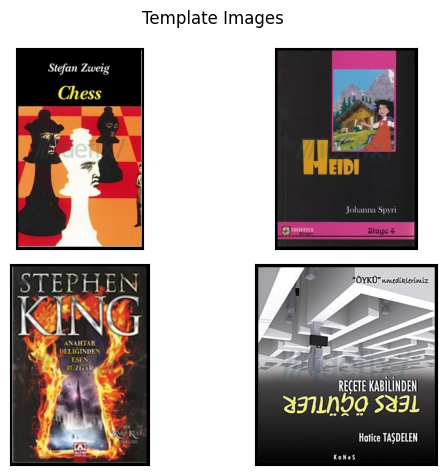

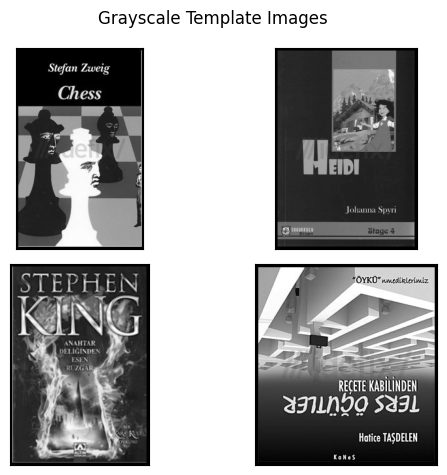

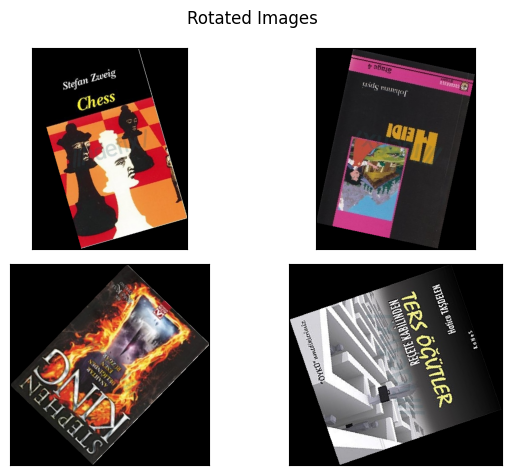

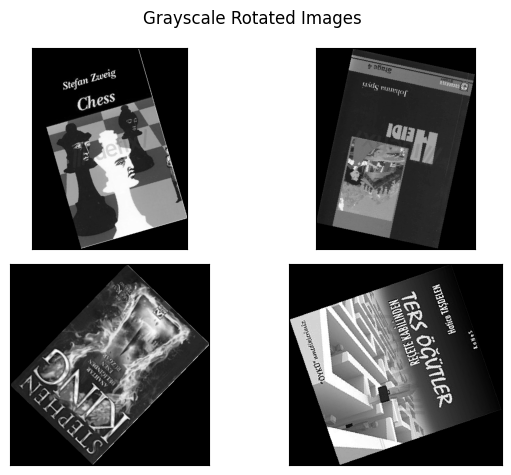

In [3]:
# Load template and rotated images
template_images, rotated_images = load_images_dict()
# Get grayscale images
template_images_grayscale, rotated_images_grayscale = rgb_to_grayscale_dict(template_images, rotated_images)
# Display four sample template images
four_sample_images(template_images, "Template Images", image_index_list)
# Display four sample grayscale images
four_sample_images(template_images_grayscale, "Grayscale Template Images", image_index_list)
# Display four sample rotated images
four_sample_images(rotated_images, "Rotated Images", image_index_list)
# Display four sample grayscale rotated images
four_sample_images(rotated_images_grayscale, "Grayscale Rotated Images", image_index_list)

## Perform Edge Detection

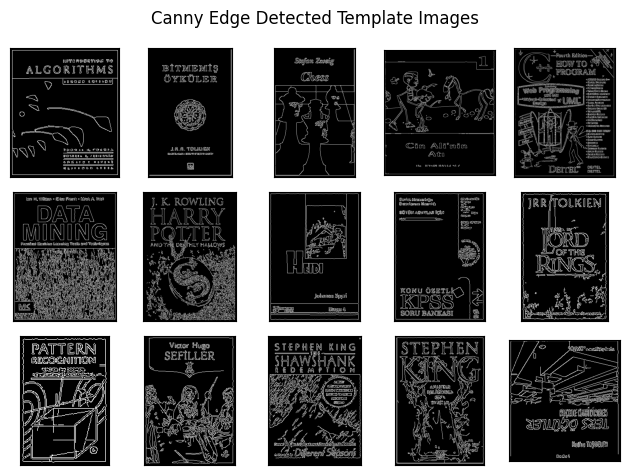

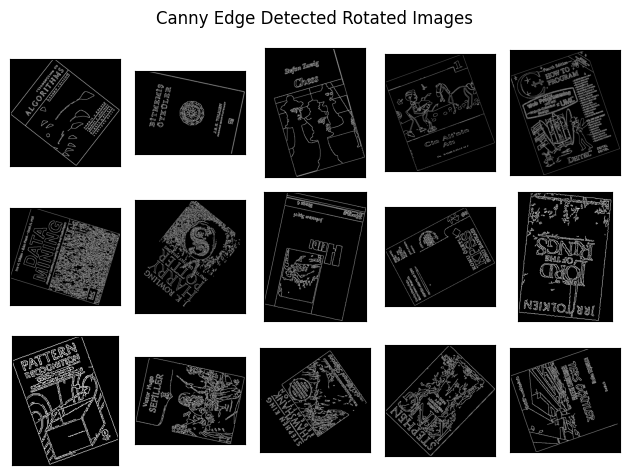

In [4]:
# Apply Canny edge detection to all images in the dicts
template_images_canny, rotated_images_canny = canny_dict(template_images_grayscale, rotated_images_grayscale, 100)
# Display all canny edge detected images
display_all_images(template_images_canny, "Canny Edge Detected Template Images")
# Display all canny edge detected rotated images
display_all_images(rotated_images_canny, "Canny Edge Detected Rotated Images")

## Perform Line Fitting

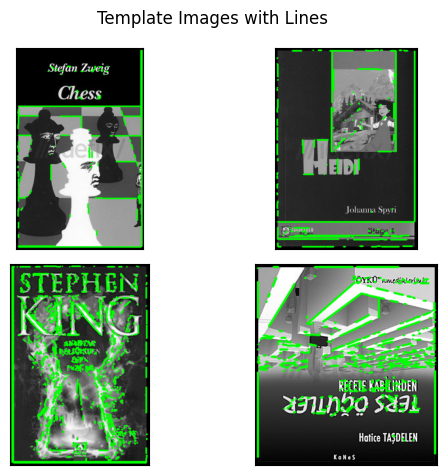

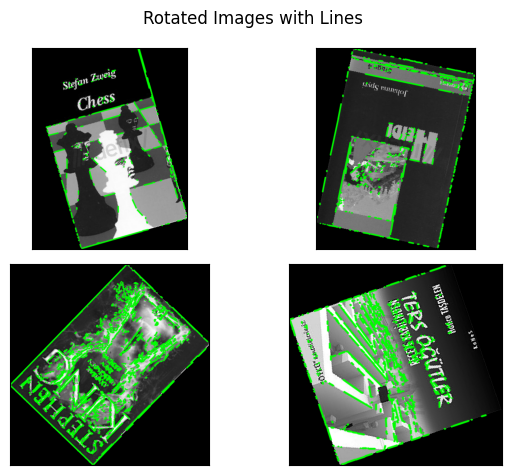

In [5]:
# Get Hough transformations
template_images_hough, rotated_images_hough = hough_dict(template_images_canny, rotated_images_canny)
# Fit lines
template_images_with_lines, rotated_images_with_lines = draw_lines_dict(template_images_grayscale, rotated_images_grayscale, template_images_hough, rotated_images_hough)
# Display four sample images with lines
four_sample_images(template_images_with_lines, "Template Images with Lines", image_index_list)
four_sample_images(rotated_images_with_lines, "Rotated Images with Lines", image_index_list)

## Compute Line Orientation Histograms

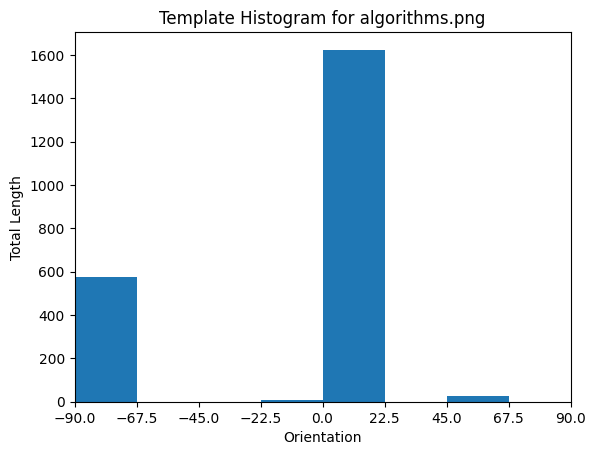

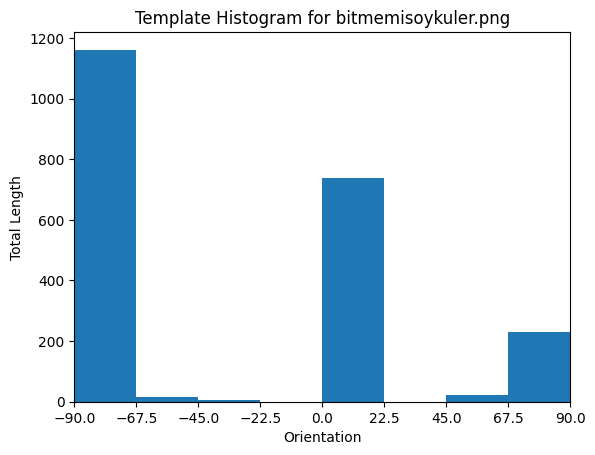

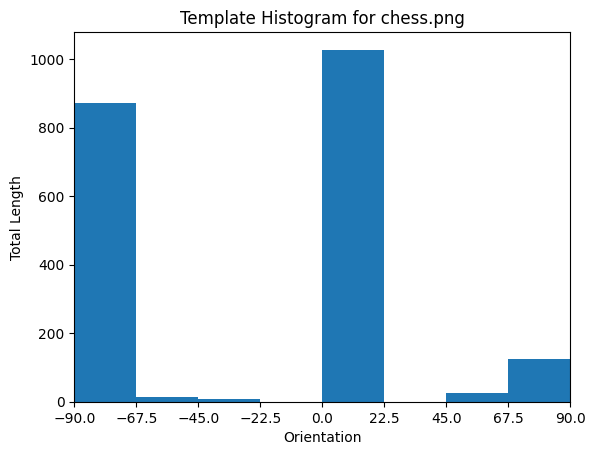

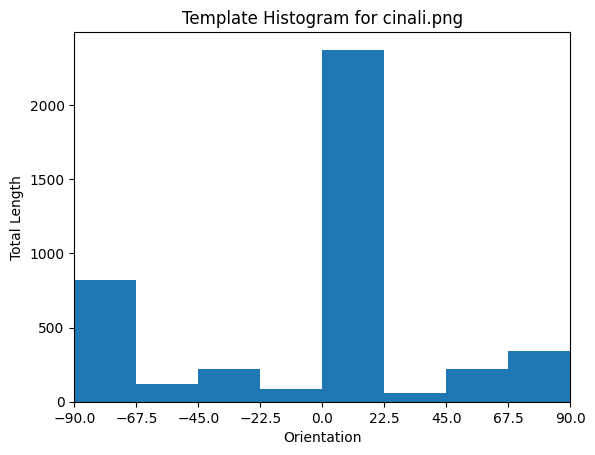

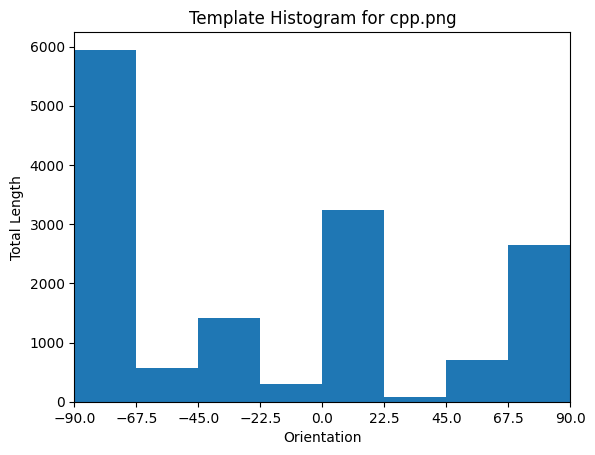

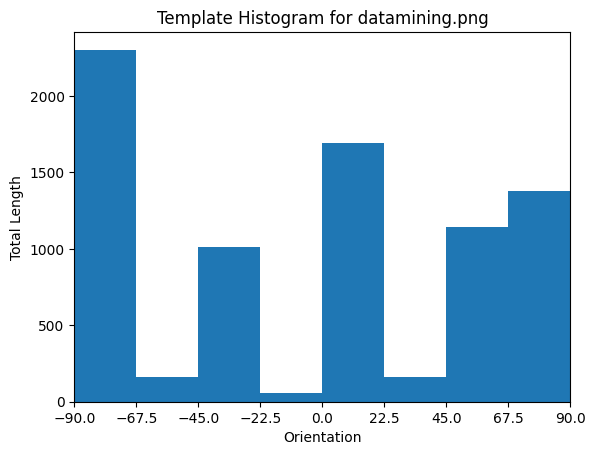

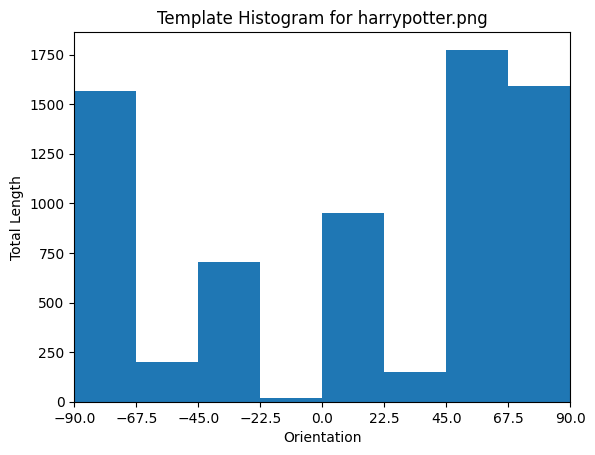

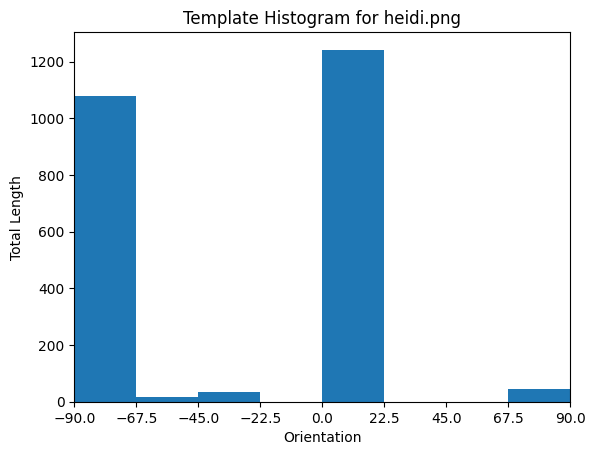

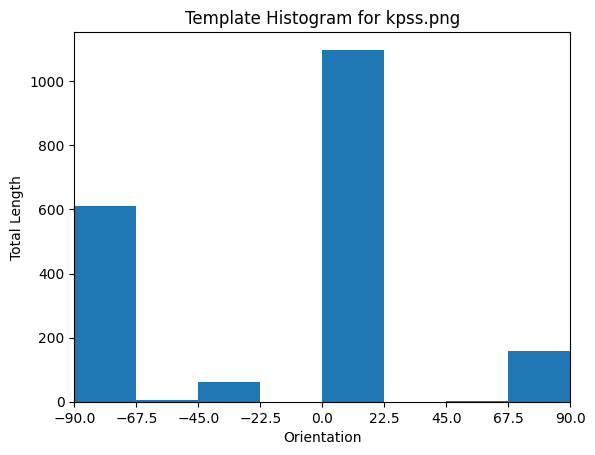

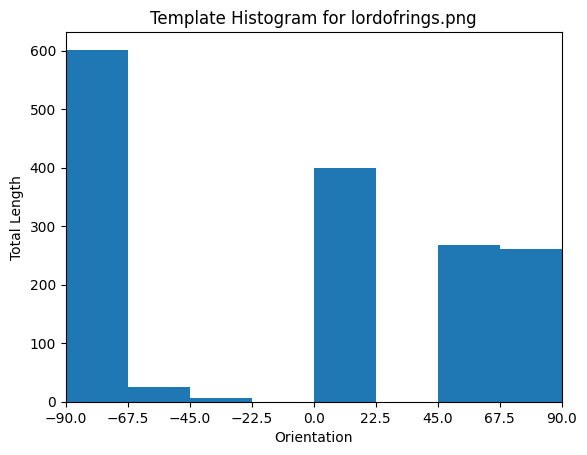

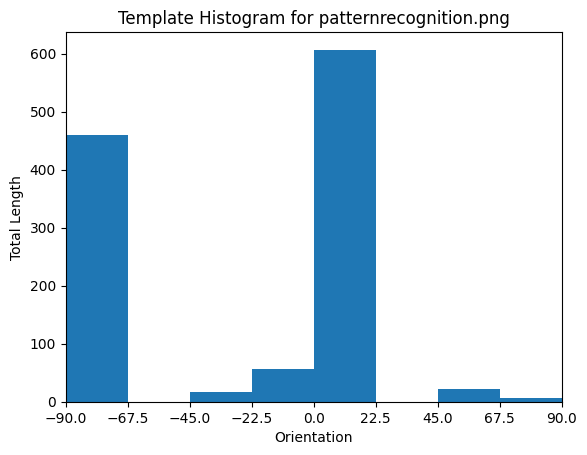

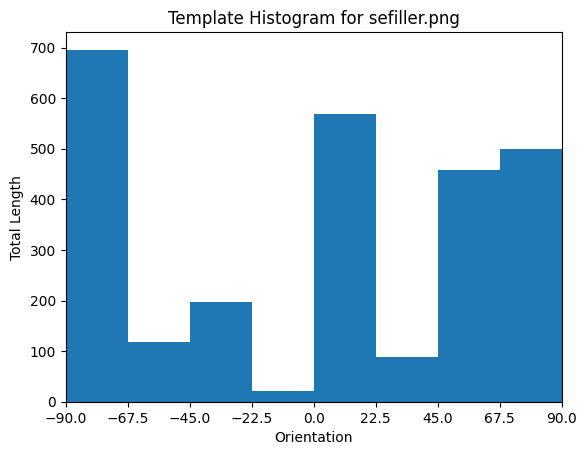

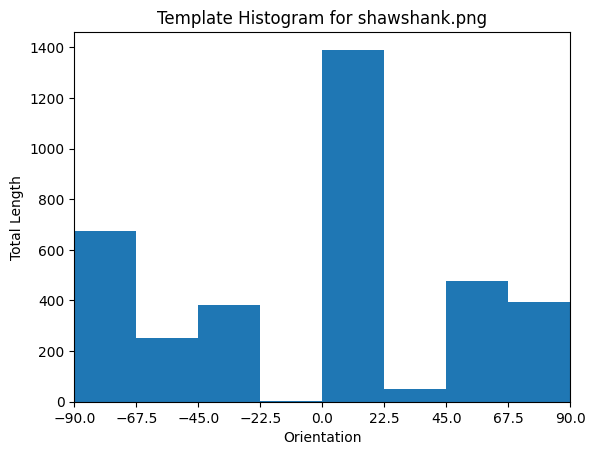

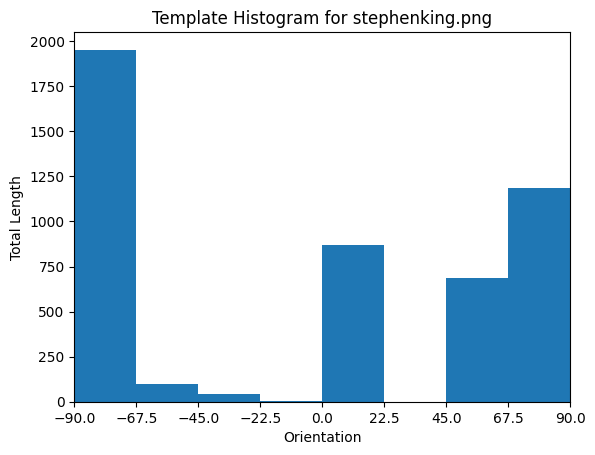

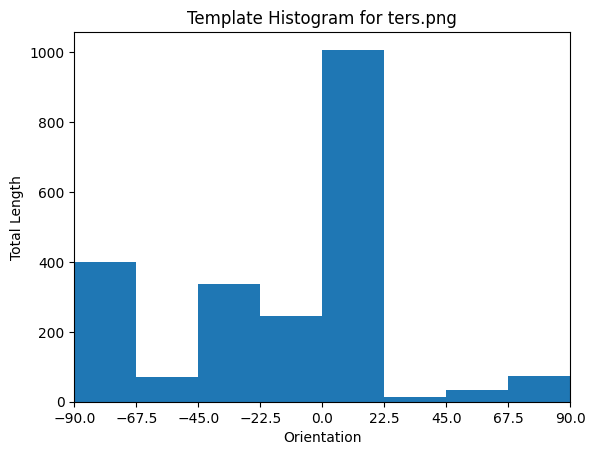

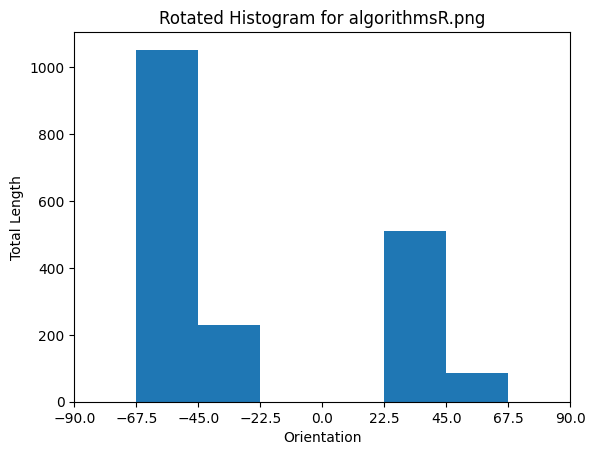

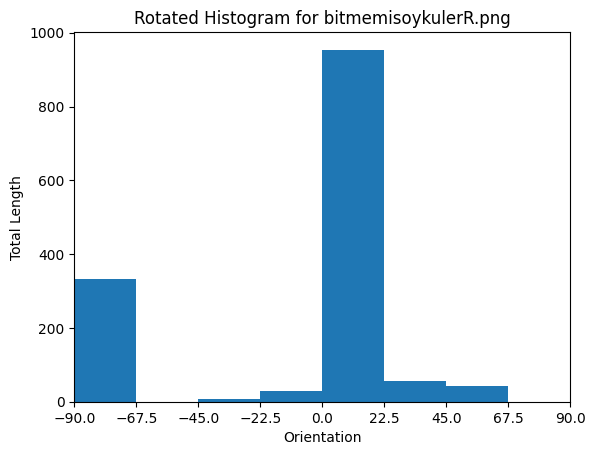

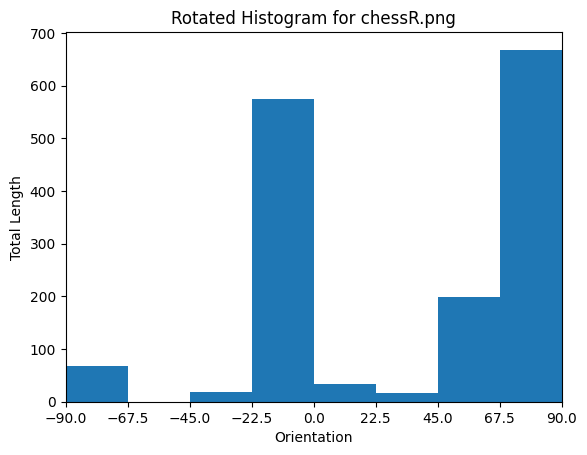

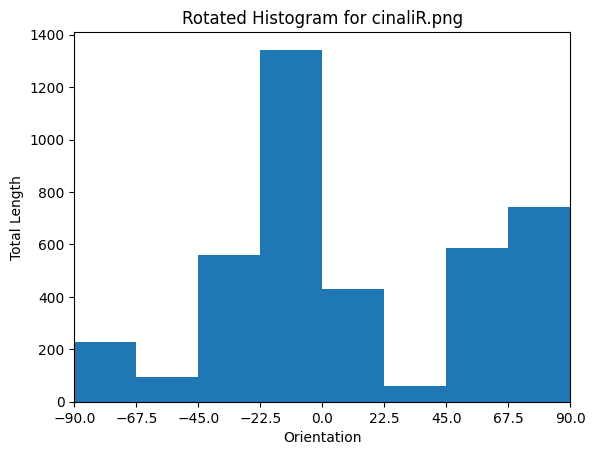

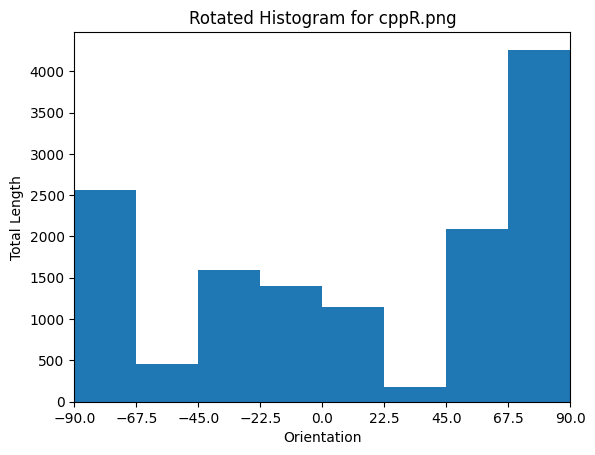

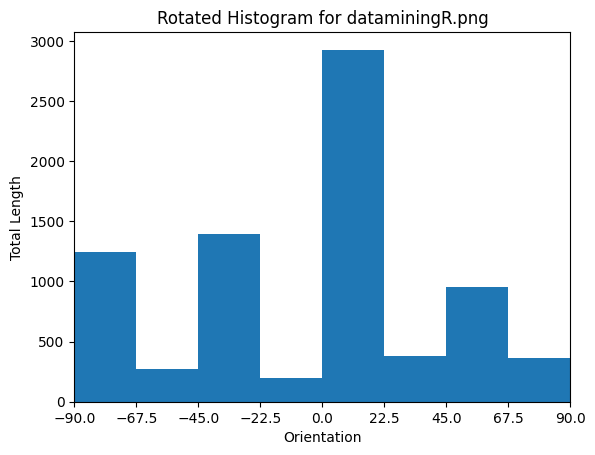

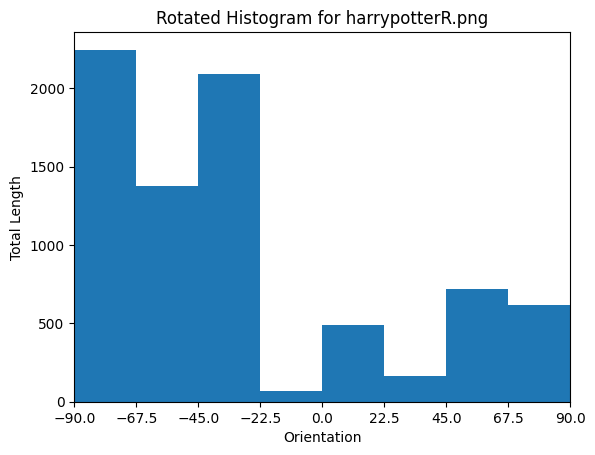

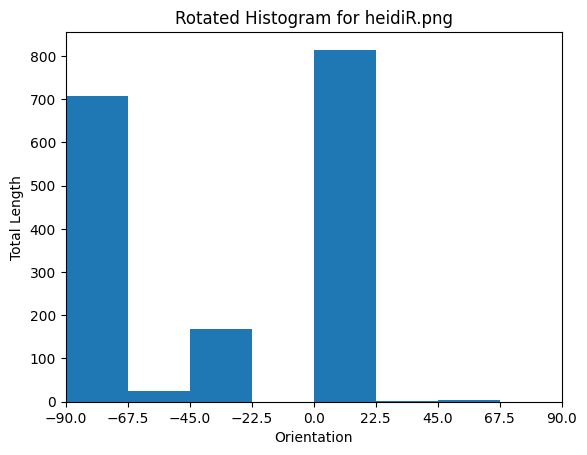

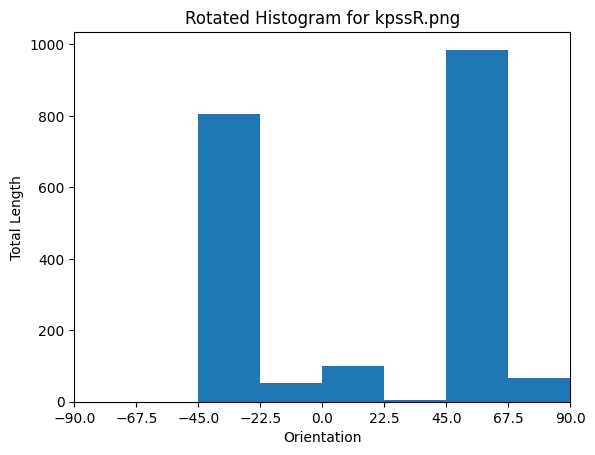

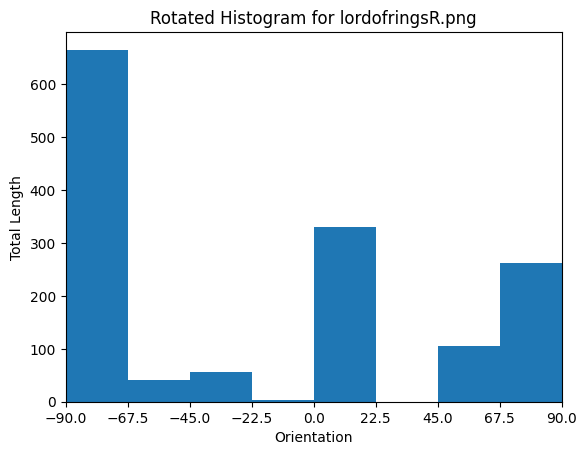

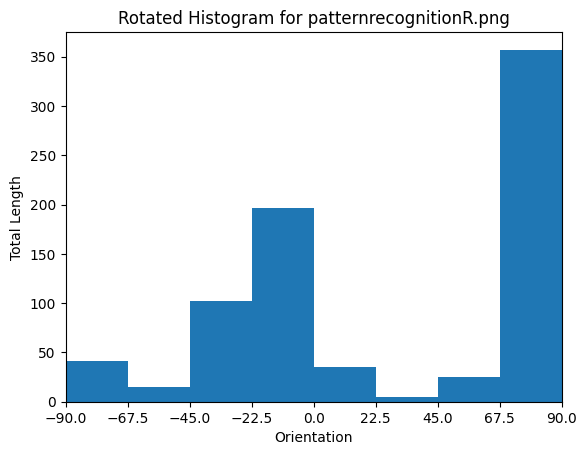

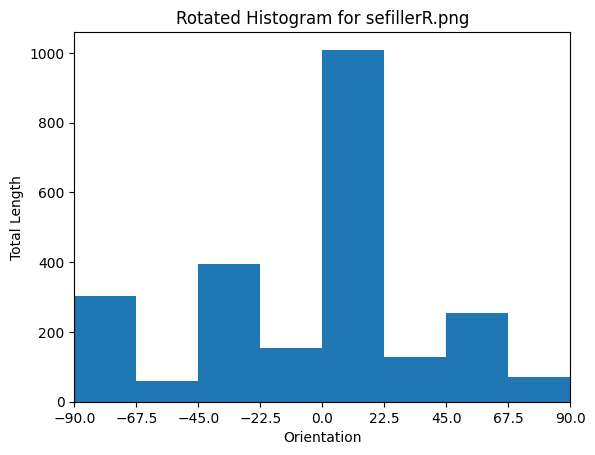

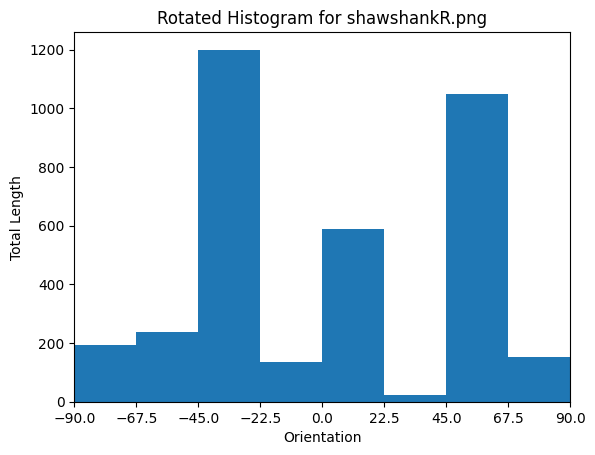

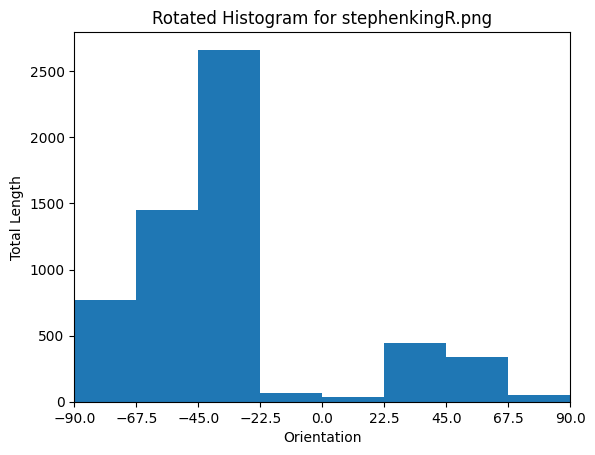

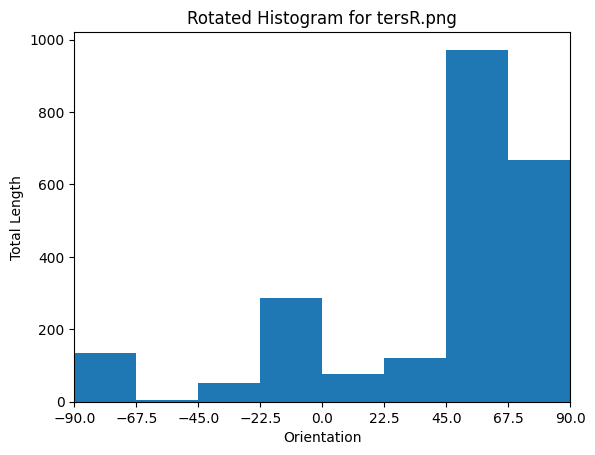

In [6]:
template_images_lines_orientation_length, rotated_images_lines_orientation_length = get_lines_orientation_length(template_images_hough, rotated_images_hough)
template_images_histogram, rotated_images_histogram = get_orientation_histogram(template_images_lines_orientation_length, rotated_images_lines_orientation_length)

## Match to Rotated Image and Find Angle of Rotation

In [7]:
matches_angles = get_matching(template_images_histogram, rotated_images_histogram)
score = 0
for image_name, tuple in matches_angles.items():
    print(f"The best match for {image_name} is {tuple[0]} with an angle of {tuple[1]} degrees counterclockwise rotation.")
    if image_name[:-4] == tuple[0][:-5]:
        score += 1
print(f"Score: {score}")

The best match for algorithms.png is algorithmsR.png with an angle of 66 degrees counterclockwise rotation.
The best match for bitmemisoykuler.png is kpssR.png with an angle of 44 degrees counterclockwise rotation.
The best match for chess.png is kpssR.png with an angle of 132 degrees counterclockwise rotation.
The best match for cinali.png is cinaliR.png with an angle of 22 degrees counterclockwise rotation.
The best match for cpp.png is cppR.png with an angle of 22 degrees counterclockwise rotation.
The best match for datamining.png is dataminingR.png with an angle of 88 degrees counterclockwise rotation.
The best match for harrypotter.png is harrypotterR.png with an angle of 132 degrees counterclockwise rotation.
The best match for heidi.png is kpssR.png with an angle of 132 degrees counterclockwise rotation.
The best match for kpss.png is kpssR.png with an angle of 132 degrees counterclockwise rotation.
The best match for lordofrings.png is chessR.png with an angle of 22 degrees co